# Finding Heavy Traffic Indicators on I-94

# 1. The I-94 Traffic Dataset

In this project we will be analyzing a dataset regrading westbound traffic on the I-94 Interstate Highway.

We will be determining different heavy traffic indicators on I-94 such as weather, time, and day.

In [1]:
import pandas as pd
traffic=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

print(traffic.head())
print(traffic.tail())
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

# 2. Analyzing Traffic Volume

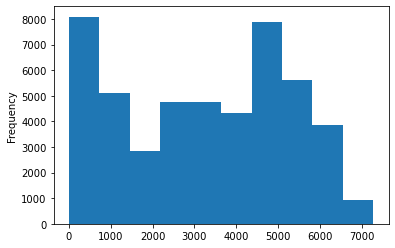

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic["traffic_volume"].plot.hist()
plt.show()


print(traffic["traffic_volume"].describe())

Above we can see that the hourly traffic varied between 0 and 7280. We can also see that we have a bimodal graph. It is likely that this varied based on time of day, with the bottom 25% occurring during the night and the upper 25%-40% occuring during rush hour.

# 3. Traffic Volume: Day vs. Night

In [11]:
traffic["date_time"]=pd.to_datetime(traffic["date_time"])
day=traffic[(traffic["date_time"].dt.hour>=7) & (traffic["date_time"].dt.hour<19)]
night=traffic[(traffic["date_time"].dt.hour>=19) | (traffic["date_time"].dt.hour <7)]

print(night.shape)

(23877, 9)
(24327, 9)


# 4. Traffic Volume: Day vs. Night (II)

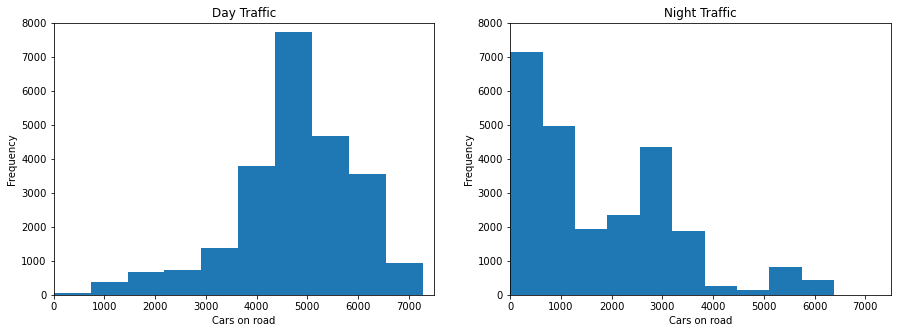

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Day Traffic")
plt.xlabel("Cars on road")
plt.ylabel("Frequency")
plt.xlim((0,7500))
plt.ylim((0,8000))
plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Night Traffic")
plt.xlabel("Cars on road")
plt.ylabel("Frequency")
plt.xlim((0,7500))
plt.ylim((0,8000))


plt.show()

print(day["traffic_volume"].describe())
print(night["traffic_volume"].describe())

We can see above that our day traffic is far greater. The day traffic is almost always between 4000 and 6000. While the night traffic is generally between 0 and 3000. The Day traffic is greatly skewed to the right while the night traffic is skewed to the left.

Since we are focused on heavy traffic indicators and heavy traffic during the night is quite rare, we will only focus on the daytime data going forward.